In [4]:
library(ggplot2)
library(viridis)
library(dplyr)
library(reshape2)
library(RColorBrewer)
sd <- read.csv("/Users/gracepanos/Desktop/Speed_Dating/Speed Dating Data.csv")

In [7]:
ATTRIBUTES/MATCH: #How important do people think attractiveness is in potential mate selection vs its real impact as seen in match rates?

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	40949 obs. of  16 variables:
 $ video_id              : chr  "2kyS6SvSYSE" "1ZAPwfrtAFY" "5qpjK5DgCt4" "puqaWrEC7tY" ...
 $ trending_date         : chr  "17.14.11" "17.14.11" "17.14.11" "17.14.11" ...
 $ title                 : chr  "WE WANT TO TALK ABOUT OUR MARRIAGE" "The Trump Presidency: Last Week Tonight with John Oliver (HBO)" "Racist Superman | Rudy Mancuso, King Bach & Lele Pons" "Nickelback Lyrics: Real or Fake?" ...
 $ channel_title         : chr  "CaseyNeistat" "LastWeekTonight" "Rudy Mancuso" "Good Mythical Morning" ...
 $ category_id           : num  22 24 23 24 24 28 24 28 1 25 ...
 $ publish_time          : POSIXct, format: "2017-11-13 17:13:01" "2017-11-13 07:30:00" ...
 $ tags                  : chr  "SHANtell martin" "last week tonight trump presidency\"|\"last week tonight donald trump\"|\"john oliver trump\"|\"donald trump" "racist superman\"|\"rudy\"|\"mancuso\"|\"king\"|\"bach\"|\"racist\"|\"superman\"|\"lov

In [5]:
#View(sd$attr1_1) #need to make unique iid 
daf <- sd %>% distinct(iid, .keep_all = TRUE)

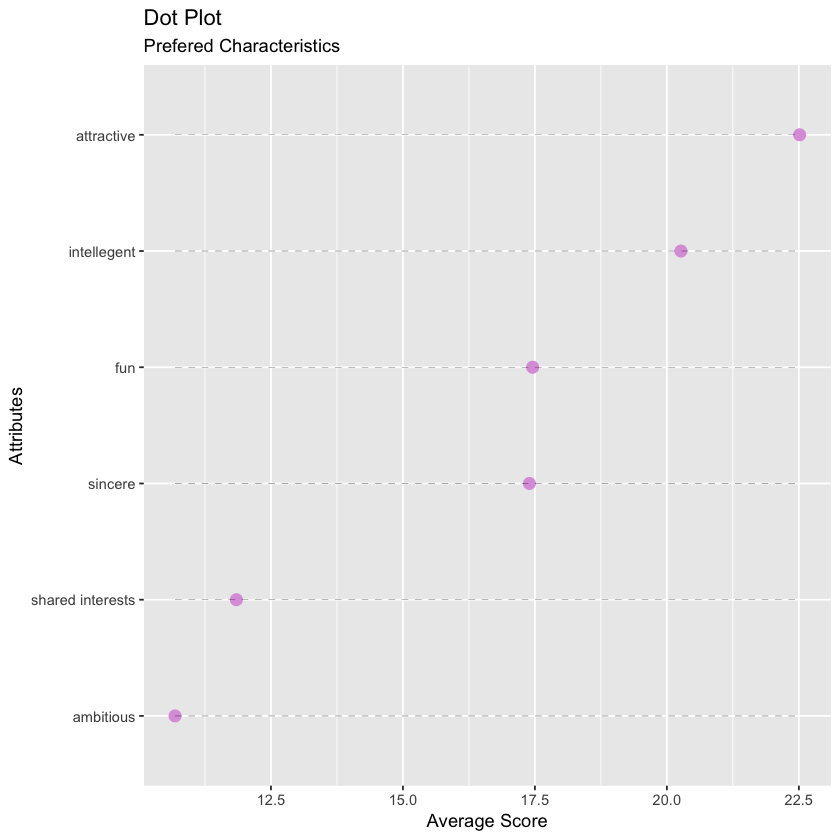

In [6]:
#Participants were given 100 points to divide amongst six characteristics, more preferable characteristics have a higher average score. 
att <- daf[, c("iid","attr1_1","sinc1_1", "intel1_1", "fun1_1", "amb1_1","shar1_1")]
at <- mean(sd$attr1_1, na.rm= TRUE)
si <-mean(sd$sinc1_1, na.rm = TRUE)
it <- mean(sd$intel1_1, na.rm=TRUE)
fu <- mean(sd$fun1_1, na.rm = TRUE)
am <- mean(sd$amb1_1, na.rm = TRUE)
sh <- mean(sd$shar1_1, na.rm = TRUE)
h <- c("attractive", "sincere", "intellegent", "fun", "ambitious", "shared interests")
i <- c(as.numeric(at), as.numeric(si), as.numeric(it), as.numeric(fu), as.numeric(am), as.numeric(sh))
mea <- data.frame(h,i)
mea$h <- factor(mea$h, levels = mea$h[order(mea$i)])
ggplot(mea, aes(x=h, y=i)) + 
  geom_point(col="plum", size=3) +   # Draw points
  geom_segment(aes(x=h,
                   xend=h,
                   y=min(i), 
                   yend=max(i)), 
               linetype="dashed", 
               size=0.1) +   # Draw dashed lines
  labs(title="Dot Plot",
       x= "Attributes",
       y="Average Score",
       subtitle="Prefered Characteristics") +  
  coord_flip()

In [ ]:
#Participants were asked to rate their own attractiveness on a scale of 1 to 10 (1 being very unattractive, 10 being very attractive). They also reported the amount of matches they got at the end of the night. This dot plot displays how many matches people participants of different levels of attractiveness received. The trend line represents the average amount of matches for people of each level of attractiveness. On average, who rated themselves as more attractive receive more matches than people who rate themselves as less attractive. Most participants rated themselves at a 7 or an 8, so there is less data for people that rated themselves below a 6. This may explain the trend of less attractive people receiving a lower match rate.

Warning message:
“Removed 9 rows containing non-finite values (stat_smooth).”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 7”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message:
“Removed 9 rows containing missing values (geom_point).”

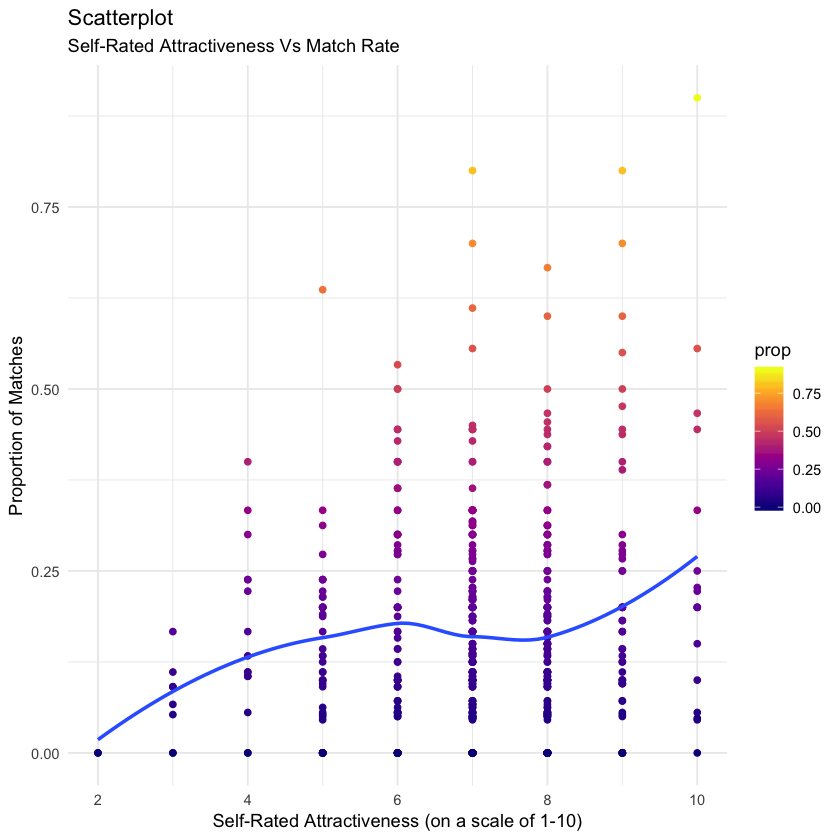

In [7]:
s <- sd[, c("iid","round","match", "attr3_1")]
xy <- aggregate(s$match, by=list(iid=s$iid), FUN=sum)
z <- s %>% distinct(iid, .keep_all = TRUE)
zxy <- cbind(z,xy)
ah <- sexy[, c("iid","round","attr3_1", "x")]
ah$prop <- sexy$x/sexy$round
gg <- ggplot(ah, aes(x=attr3_1, y=prop)) + 
  geom_point(aes(col=prop)) + 
  geom_smooth(method="loess", se=FALSE) + 
  labs(subtitle="Self-Rated Attractiveness Vs Match Rate", 
       y="Proportion of Matches", 
       x="Self-Rated Attractiveness (on a scale of 1-10)", 
       title="Scatterplot") +
  scale_color_viridis(option = "C") +
  theme_minimal()
gg

In [ ]:
#We wanted to compare this by gender

In [ ]:
#Females

Warning message in viridisLite::viridis(256, alpha, begin, end, direction, option):
“Option 'F' does not exist. Defaulting to 'viridis'.”Warning message:
“Removed 6 rows containing non-finite values (stat_smooth).”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 7”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1”Warning message:
“Removed 6 rows containing missing values (geom_point).”

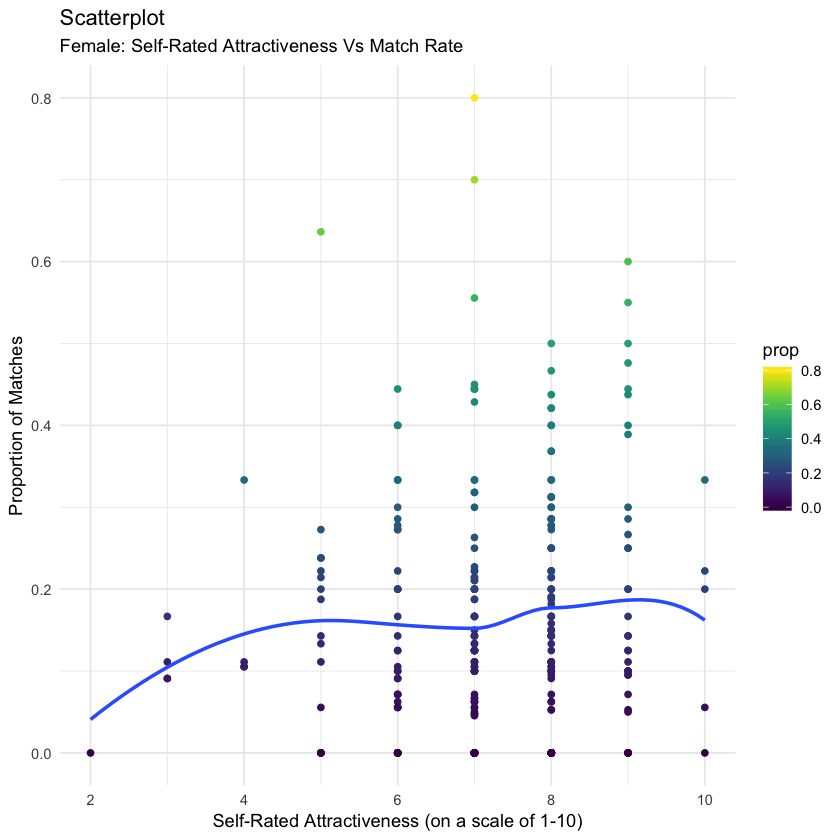

In [8]:
p <- sd[, c("iid","round","match", "attr3_1","gender")]
q <- aggregate(s$match, by=list(iid=s$iid), FUN=sum)
r <- p %>% distinct(iid, .keep_all = TRUE)
t <- cbind(r,q)
q <- t[, c("iid","round","attr3_1", "x","gender")]
q$prop <- q$x/q$round
fem <- q[q$gender==0,]
gg1 <- ggplot(fem, aes(x=attr3_1, y=prop)) + 
  geom_point(aes(col=prop)) + 
  geom_smooth(method="loess", se=F) + 
  labs(subtitle="Female: Self-Rated Attractiveness Vs Match Rate", 
       y="Proportion of Matches", 
       x="Self-Rated Attractiveness (on a scale of 1-10)", 
       title="Scatterplot") +
  scale_color_viridis(option = "F")+
  theme_minimal()
gg1

In [ ]:
#Males

Warning message:
“Removed 3 rows containing non-finite values (stat_smooth).”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 7”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message:
“Removed 3 rows containing missing values (geom_point).”

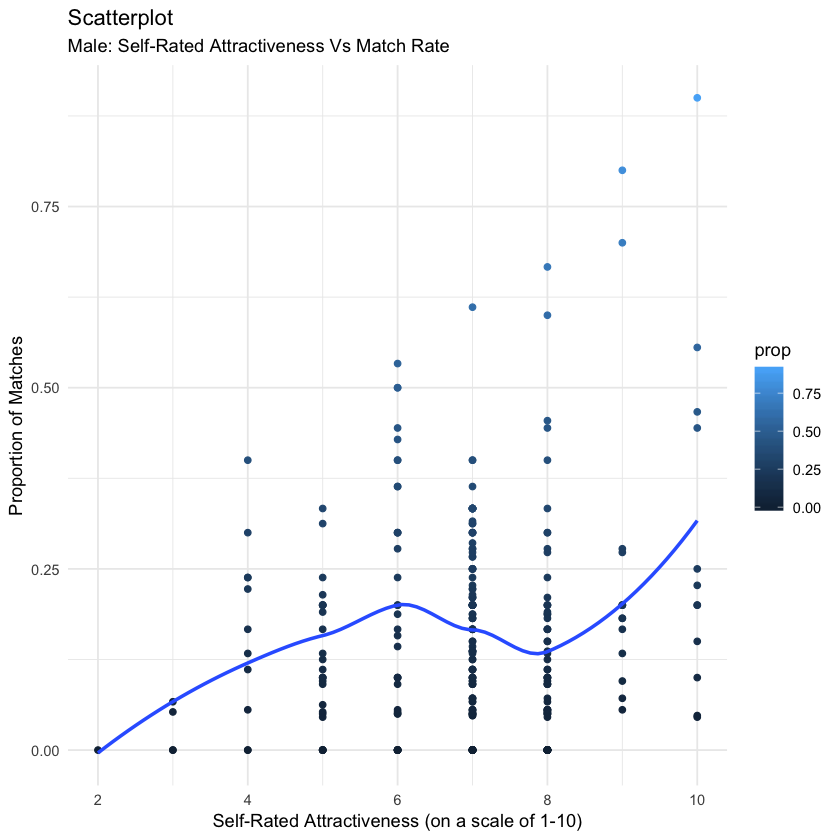

In [9]:
p <- sd[, c("iid","round","match", "attr3_1","gender")]
q <- aggregate(s$match, by=list(iid=s$iid), FUN=sum)
r <- p %>% distinct(iid, .keep_all = TRUE)
t <- cbind(r,q)
q <- t[, c("iid","round","attr3_1", "x","gender")]
q$prop <- q$x/q$round
mal <- q[q$gender==1,]
gg2 <- ggplot(mal, aes(x=attr3_1, y=prop)) + 
  geom_point(aes(col=prop)) + 
  geom_smooth(method="loess", se=F) + 
  labs(subtitle="Male: Self-Rated Attractiveness Vs Match Rate", 
       y="Proportion of Matches", 
       x="Self-Rated Attractiveness (on a scale of 1-10)", 
       title="Scatterplot") +
  theme_minimal()
gg2

In [ ]:
#MATCH: Can people accurately predict their own perceived value in the dating market?

In [10]:
a <- sd[, c("iid","round","match", "match_es","gender")]
b <- aggregate(a$match, by=list(iid=a$iid), FUN=sum)
c <- a %>% distinct(iid, .keep_all = TRUE)
d <- cbind(c,b)
oh <- d[, c("iid","round","match_es", "x","gender")]
oh$prop <- oh$x/oh$round

In [ ]:
#Males

[1] 0.164895

[1] 0.2003184

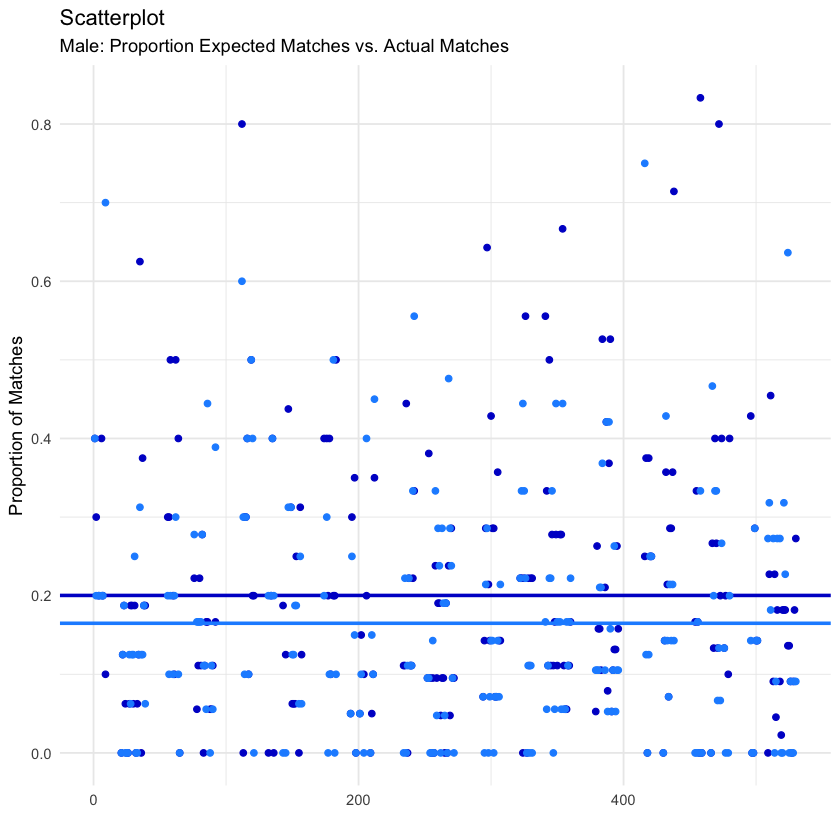

In [11]:
maldata <- oh[oh$gender==0,]
maldata$expected_match_prop <- maldata$match_es/maldata$round
#maldata[complete.cases(maldata),]
m <- na.omit(maldata)
m$diff <- m$expected_match_prop-m$prop
mean(m$prop)
mean(m$expected_match_prop)
g <- ggplot(m) +
  geom_point(aes(iid,expected_match_prop), colour="mediumblue") + 
  geom_hline(yintercept = 0.2003184, color="mediumblue", size=1)+
  geom_point(aes(iid,prop), colour="dodgerblue") +
  geom_hline(yintercept = 0.164895, color="dodgerblue", size=1) +
  labs(subtitle="Male: Proportion Expected Matches vs. Actual Matches", 
       y="Proportion of Matches", 
       x="", 
       title="Scatterplot") +
  theme_minimal()
g

In [ ]:
#Female

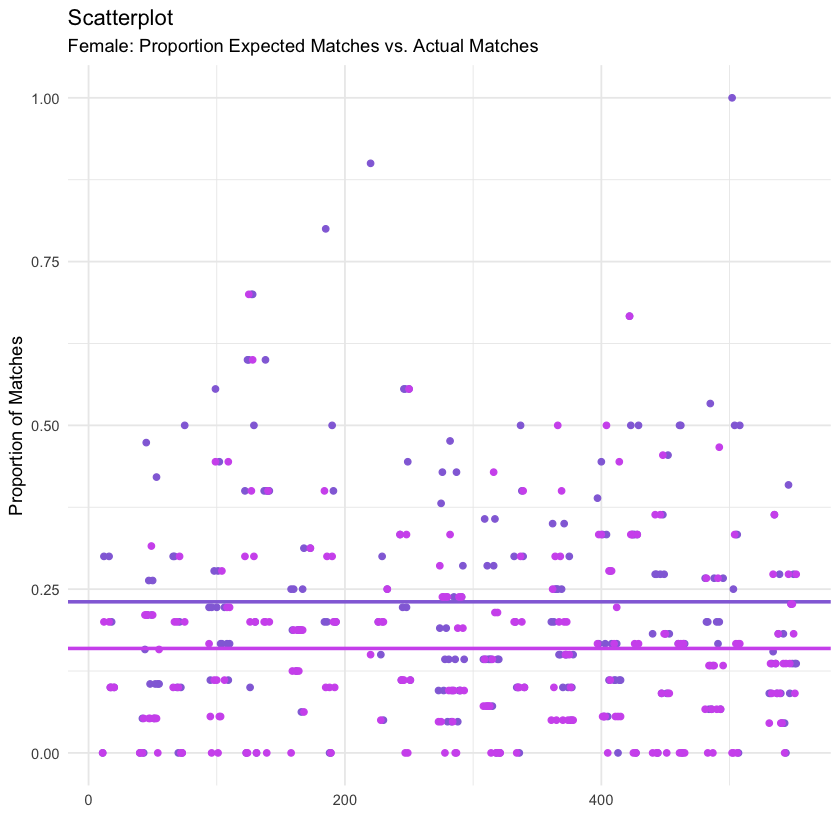

In [12]:
femdata <- oh[oh$gender==1,]
femdata$expected_match_prop <- femdata$match_es/femdata$round
#femdata[complete.cases(femdata),]
f <- na.omit(femdata)
f$diff <- f$expected_match_prop-f$prop
g2 <- ggplot(f) +
  geom_point(aes(iid,expected_match_prop), colour="mediumpurple") +
  geom_hline(yintercept = 0.2306544, color="mediumpurple", size=1)+
  geom_point(aes(iid,prop), colour="mediumorchid2") +
  geom_hline(yintercept = 0.1594608, color="mediumorchid2", size=1) +
  labs(subtitle="Female: Proportion Expected Matches vs. Actual Matches", 
       y="Proportion of Matches", 
       x="", 
       title="Scatterplot") +
  theme_minimal()
g2

In [ ]:
#Difference

[1] 0.05327114

[1] 0.05327114

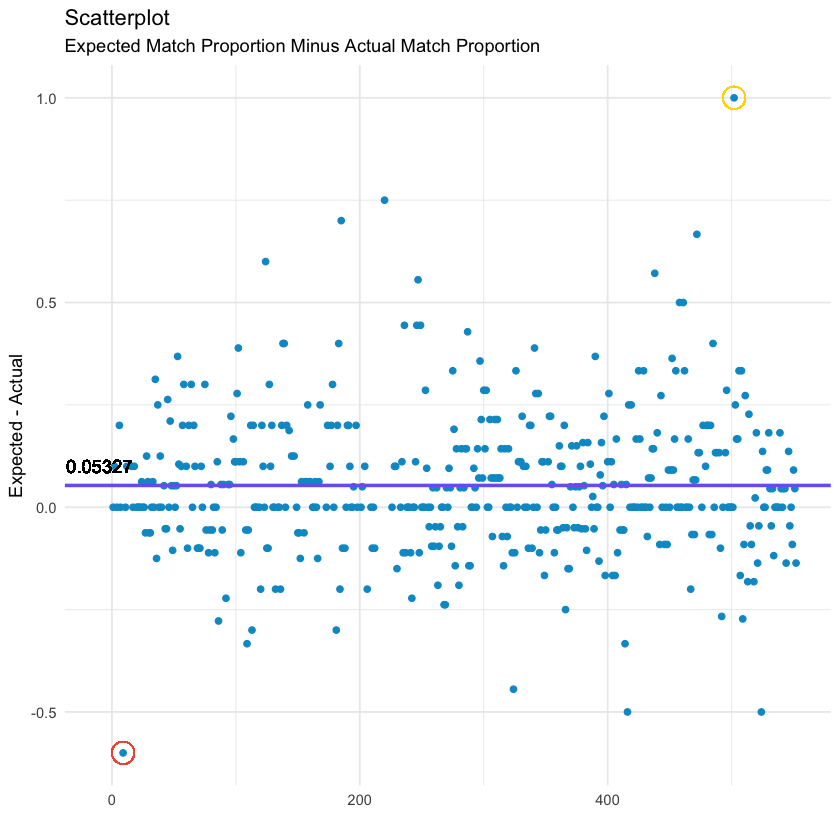

In [15]:
oh$expected_match_prop <- oh$match_es/oh$round
oh$diff <- oh$expected_match_prop-oh$prop
oh <- na.omit(oh)
mean(oh$diff)
library(ggplot2)
ggplot(oh) +
  geom_point(aes(iid,diff), colour="deepskyblue3")+
  geom_hline(yintercept=0.05327114, color="slateblue2",size=1) +
  labs(subtitle="Expected Match Proportion Minus Actual Match Proportion", 
       y="Expected - Actual", 
       x="", 
       title="Scatterplot") +
    geom_point(oh, mapping=aes(x=502, y=1), shape=1, col="gold", size=6) +
  geom_text(aes(-10,.052,label = 0.05327, vjust = -1)) +
  geom_point(oh, mapping=aes(x=9, y=-.6), shape=1, col="tomato2", size=6) +
  geom_text(aes(-10,.052,label = 0.05327, vjust = -1)) +
  theme_minimal()
  mean(oh$diff)

In [18]:
greater <- oh[oh$diff > 0,]
mean(greater$gender) #.5489 prop of females
max(greater$diff)
which.max(greater$diff)
greater[213,] #female, expected to get 6 matches in 6 dates, ended up getting 0 matches. 26 years old, electrical engineer. attended Kettering University. SAT= 1230, Asian/Pacific-Islander. From boston. "Fun night out", goes out twice a week. Attractiveness was the most important thing (40/100). She rated herself as a 7/10, fun, intelligent, ambitious 9/10.
daf[501,]

[1] 0.5489362

[1] 1

[1] 213

,iid,round,match_es,x,gender,prop,expected_match_prop,diff
501,502,6,6,0,1,0,1,1


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
501,502,1,1,2,1,20,6,2,4,5,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [17]:
less <- oh[oh$diff < 0,]
mean(less$gender) #0.4651163 prop of females
min(less$diff)
which.min(less$diff)
less[1,] #male, expected to get 1 matches in 10 dates, ended up getting 7 matches. 26 years old, Masters in Public Administration. From Palm Springs.  Attractiveness was the most important thing (40/100). He rated himself as a 7/10, fun was a 10/10.
daf[9,]

[1] 0.4651163

[1] -0.6

[1] 1

,iid,round,match_es,x,gender,prop,expected_match_prop,diff
9,9,10,1,7,0,0.7,0.1,-0.6


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
9,9,9,0,17,1,1,10,1,NA,8,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


ERROR: Error in View(daf[9, ]): ‘View()’ not yet supported in the Jupyter R kernel


In [ ]:
#This visual represents the difference in how many matches a person expects to get in a night vs. how many matches a person actually ends up with. If Expected - Actual=0, the participant correctly predicted exactly how many matches they would receive. A positive value means that the participant got less matches than they expected, and a negative value means that the participant got more matches than they expected. The average difference is .05327, meaning in general participants would get slightly less matches than they expected. We decided to do two case studies on the largest outliers. The top right (encircled in yellow) was a 26 year old asian female electrical engineer from Boston. She expected to get 6 matches in 6 dates; ended up getting 0 matches. She considered attractiveness the important trait and she rated herself as a 7/10 for attractiveness. The bottom left (encircled in orange) was a 26 year old male. He expected to get 1 match in 10 dates, but he ended up getting 7 matches. He rated himself as a 7/10 for attractiveness.                                                                                              
